# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__  The distribution of charges is NOT normally distributed.

Text(0.5, 1.0, 'Histogram of charges')

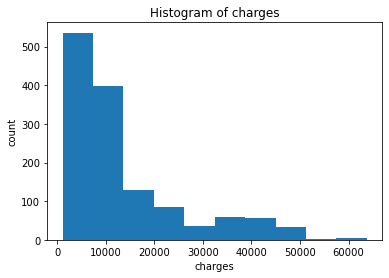

In [4]:
plt.hist(medical.charges)
plt.xlabel('charges')
plt.ylabel('count')
plt.title('Histogram of charges')

In [5]:
x_bar = np.mean(medical.charges)
s = np.std(medical.charges, ddof = 1)
print('The mean of charges is {} and the standard deviation is {}'.format(x_bar, s))

The mean of charges is 13270.422265141257 and the standard deviation is 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  
- Use a one-sample t-test, since we do not know the population standard deviation (we only know the sample standard deviation)
    - H0: Actual average charge is >= 12,000
    - Ha: Actual average charge is < 12,000
- Create a 95% confidence interval (one-tailed) for the ACTUAL average charge, and determine if the lower bound of this confidence interval is > 12,000 or < 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

In [6]:
t_critical = t.ppf(0.05, df = 1337)
t_critical

-1.6459941145571324

In [7]:
lower_limit = x_bar + t_critical*(s/np.sqrt(1338))
lower_limit

12725.48718381623

__A:__ 
- The critical t-value is -1.646
- The 95% confidence interval is (12,725.49, $\infty$)
- Since the lower bound of our confidence interval is 12,725.49, the administrator does not need to be concerned about the actual average charge falling below 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__  

$H_0$: $\mu_0 = \mu_1$

$H_A$: $\mu_0 \neq \mu_1$

We are assuming that the population variances of both groups are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

Yes, the results match from the manual approach and the scipy.stats approach

In [30]:
insured = medical[medical['insuranceclaim']==1]['charges']
insured.head()

0     16884.9240
1      1725.5523
4      3866.8552
6      8240.5896
10     2721.3208
Name: charges, dtype: float64

In [31]:
uninsured = medical[medical['insuranceclaim']==0]['charges']
uninsured.head()

2     4449.46200
3    21984.47061
5     3756.62160
7     7281.50560
8     6406.41070
Name: charges, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f833808d4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f833808dbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f833808d190>,
 'medians': [<matplotlib.lines.Line2D at 0x7f83682912b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8368291610>,
 'means': []}

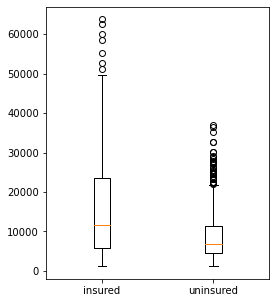

In [33]:
plt.figure(figsize = (4, 5))
plt.boxplot([insured, uninsured], labels = ['insured', 'uninsured'])

In [36]:
#Calculate sample statistics
#Subscript 1 is for insured, subscript 0 is for uninsured

n1 = len(insured)
n0 = len(uninsured)
print('Sample size of insured is {}, sample size of uninsured is {}'.format(n1, n0))

x1 = np.mean(insured)
x0 = np.mean(uninsured)
print('Mean of insured is {}, mean of uninsured is {}'.format(x1, x0))

s1 = np.std(insured, ddof = 1)
s0 = np.std(uninsured, ddof = 1)
print('Standard deviation of insured is {}, standard deviation of uninsured is {}'.format(s1, s0))


Sample size of insured is 783, sample size of uninsured is 555
Mean of insured is 16423.928276537663, mean of uninsured is 8821.421892306294
Standard deviation of insured is 14045.928418802127, standard deviation of uninsured is 6446.510126811736


In [37]:
#calculate pooled standard deviation
s_pooled = np.sqrt(((n1 - 1)*(s1**2) + (n0 - 1)*(s0**2)) / (n1 + n0 - 2))
s_pooled

11520.034268775256

In [38]:
#Calculate standard error of our estimator
std_error = s_pooled*np.sqrt((1/n1)+(1/n0))
std_error

639.2260351391293

In [39]:
#Calculate test statistic (critical t value)
critical_t = (xbar_insured - xbar_uninsured)/(std_error)
critical_t

11.89329903087671

In [43]:
#Calculate p-value
p_value = t.sf(critical_t, df=22)*2
p_value

4.7185753486105125e-11

In [50]:
#Comparing with using the appropriate function from scipy.stats
from scipy.stats import ttest_ind
critical_t_scipy, p_value_scipy = ttest_ind(insured, uninsured)
print('Critical t: ', critical_t_scipy)
print('P-value: ', p_value_scipy)

Critical t:  11.893299030876712
P-value:  4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

No, scipy.stats does NOT have a z-test.  Most likely it's because we will rarely know the true population standard deviation necessary for the z-test.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test